In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities
import matplotlib.pyplot as plt
from numpy import array
from multiprocessing import Pool
import multiprocessing as mp
from consts import sensor_lat as lat
from consts import sensor_log as log
from consts import valid_sensor_res_10 as valid_sensor_list
from consts import valid_sensor_res_10_old as valid_sensor_list_old
from consts import sensor_day_seconds as day_seconds
from consts import sensor_week_seconds as week_seconds 
from consts import sensor_start_time_unix as start_time
from consts import sensor_end_time_unix as end_time
from consts import sensor_epoch_length as epoch_length
from consts import sensor_optimal_time_interval as optimal_time_interval
from consts import sensor_loc_pic as loc_pic
from consts import sensor_drop_list as drop_list
import consts
import time
import pickle
import copy
import h5py
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.utils.data as Data

In [3]:
filename = "intel_indoor_10_4.pkl"
with open(filename,'rb') as f:
    data_array = pickle.load(f)

In [4]:
data_array.shape

(17648, 4, 10)

In [11]:
mean_list = []
std_list = []
for item in data_array:
    mean_list.append(np.mean(item))
    std_list.append(np.std(item))

(array([ 97., 205., 373., 349., 423., 696., 487., 464., 362., 369., 395.,
        438., 351., 328., 345., 340., 293., 246., 205., 130., 149., 105.,
        105., 101.,  89.,  91., 100., 129., 154., 178., 236., 257., 268.,
        319., 363., 391., 461., 441., 446., 489., 473., 536., 495., 532.,
        448., 415., 429., 383., 327., 312., 259., 199., 193., 170., 125.,
         83.,  59.,  56.,  32.,  22.,  13.,  14.,  18.,  14.,   7.,   3.,
         15.,  16.,  11.,  13.,  14.,  13.,  18.,  11.,  13.,  12.,  16.,
         10.,  14.,   6.,   9.,   3.,  11.,   8.,   9.,   4.,   3.,   3.,
          5.,   3.,   3.,   8.,   3.,   0.,   1.,   3.,   0.,   0.,   2.,
          3.]),
 array([ 16.72135358,  17.60038795,  18.47942231,  19.35845668,
         20.23749104,  21.1165254 ,  21.99555977,  22.87459413,
         23.7536285 ,  24.63266286,  25.51169722,  26.39073159,
         27.26976595,  28.14880032,  29.02783468,  29.90686905,
         30.78590341,  31.66493777,  32.54397214,  33.4230065 

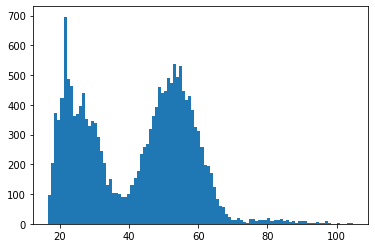

In [12]:
plt.hist(mean_list,bins=100)

(array([1.771e+03, 5.340e+02, 4.660e+02, 3.700e+02, 1.380e+02, 1.620e+02,
        9.100e+01, 1.070e+02, 1.210e+02, 8.300e+01, 2.900e+01, 5.500e+01,
        3.000e+01, 2.900e+01, 2.300e+01, 3.000e+01, 5.600e+01, 1.410e+02,
        5.600e+01, 6.200e+01, 7.800e+01, 6.600e+01, 8.100e+01, 8.800e+01,
        9.000e+01, 1.030e+02, 9.900e+01, 1.120e+02, 1.210e+02, 1.170e+02,
        1.390e+02, 1.400e+02, 1.520e+02, 1.320e+02, 1.300e+02, 1.370e+02,
        1.250e+02, 1.000e+02, 8.900e+01, 8.800e+01, 7.900e+01, 8.100e+01,
        9.700e+01, 6.600e+01, 7.700e+01, 4.900e+01, 5.500e+01, 4.900e+01,
        4.400e+01, 4.600e+01, 5.300e+01, 5.000e+01, 6.800e+01, 6.400e+01,
        6.300e+01, 9.200e+01, 1.180e+02, 1.470e+02, 1.690e+02, 2.020e+02,
        2.210e+02, 2.520e+02, 3.020e+02, 3.030e+02, 3.500e+02, 3.780e+02,
        3.810e+02, 4.110e+02, 4.550e+02, 4.440e+02, 4.380e+02, 4.350e+02,
        4.550e+02, 4.920e+02, 4.840e+02, 4.370e+02, 4.110e+02, 4.180e+02,
        4.090e+02, 3.640e+02, 2.790e+0

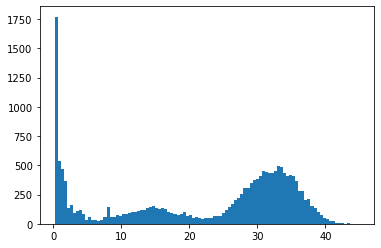

In [13]:
plt.hist(std_list,bins=100)

In [8]:
data_tensor = torch.tensor(data_array)

In [9]:
data_tensor.shape

torch.Size([17648, 4, 10])

In [11]:
train_db,test_db = torch.utils.data.random_split(data_tensor.float(),[15000,2648])

In [12]:
train_loader = Data.DataLoader(
    dataset = train_db,
    batch_size=500,
    shuffle=True,
    num_workers=16
)

In [13]:
test_loader = Data.DataLoader(
    dataset = test_db,
    batch_size=500,
    shuffle=True,
    num_workers=16
)

In [15]:
torch.save(train_loader,'dataloader_intel_indoor_1_train.pt')

In [16]:
torch.save(test_loader,'dataloader_intel_indoor_1_test.pt')